In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the file path to the CSV file that needs to be read
file_path = 'UoB_Set01_2025-05-16tapes.csv'

# Set header=None and manually specify the column names as 'Time', 'Price', 'Size'
df = pd.read_csv(file_path, header=None, names=['Time', 'Price', 'Size'])

# Using the apply method to calculate the weighted average price and total size
weighted_df = df.groupby('Time').apply(lambda x: pd.Series({
    'Weighted_Price': (x['Price'] * x['Size']).sum() / x['Size'].sum(),
    'Total_Size': x['Size'].sum(),
    'Order_Number': x.shape[0]
})).reset_index()

weighted_df['Total_Size'] = weighted_df['Total_Size'].round().astype(int)
weighted_df['Order_Number'] = weighted_df['Order_Number'].astype(int)
weighted_df[:20]

,Time,Weighted_Price,Total_Size,Order_Number
0,4.836,142.00,1,1
1,6.913,129.00,3,1
2,9.052,130.00,1,1
3,9.300,128.00,1,1
4,12.989,132.00,1,1
5,14.260,129.00,4,1
6,14.353,132.50,2,2
7,17.856,131.00,1,1
8,17.918,132.00,2,1
9,18.290,131.00,1,1


In [3]:
# Load the provided CSV data into a DataFrame
df = pd.read_csv(file_path, header=None, names=['Time', 'Price', 'Size'])

# Calculate the weighted average price and total size
weighted_df = df.groupby('Time').apply(lambda x: pd.Series({
    'Weighted_Price': (x['Price'] * x['Size']).sum() / x['Size'].sum(),
    'Total_Size': x['Size'].sum(),
    'Order_Number': x.shape[0]
})).reset_index()

# Convert data types
weighted_df['Total_Size'] = weighted_df['Total_Size'].round().astype(int)
weighted_df['Order_Number'] = weighted_df['Order_Number'].astype(int)


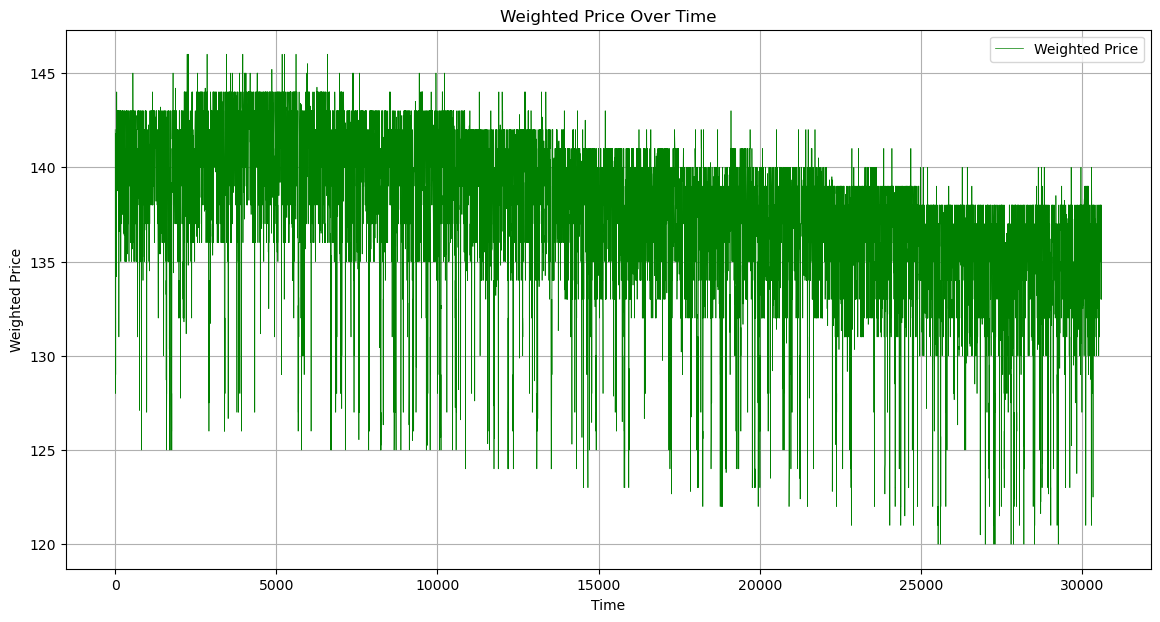

In [4]:
# Create a line chart for Weighted_Price over Time 
plt.figure(figsize=(14, 7))
plt.plot(weighted_df['Time'], weighted_df['Weighted_Price'], label='Weighted Price', linewidth=0.5, color='green')
plt.xlabel('Time')
plt.ylabel('Weighted Price')
plt.title('Weighted Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

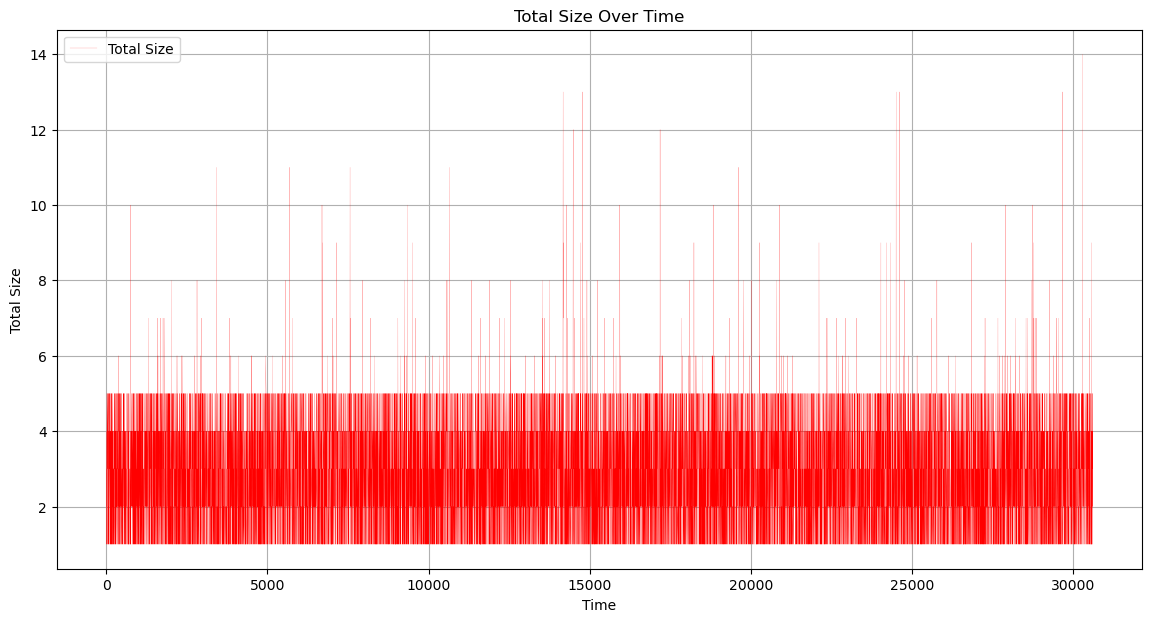

In [5]:
# Create a line chart for Total_Size over Time
plt.figure(figsize=(14, 7))
plt.plot(weighted_df['Time'], weighted_df['Total_Size'], label='Total Size', linewidth=0.1, color='red')
plt.xlabel('Time')
plt.ylabel('Total Size')
plt.title('Total Size Over Time')
plt.legend()
plt.grid(True)
plt.show()

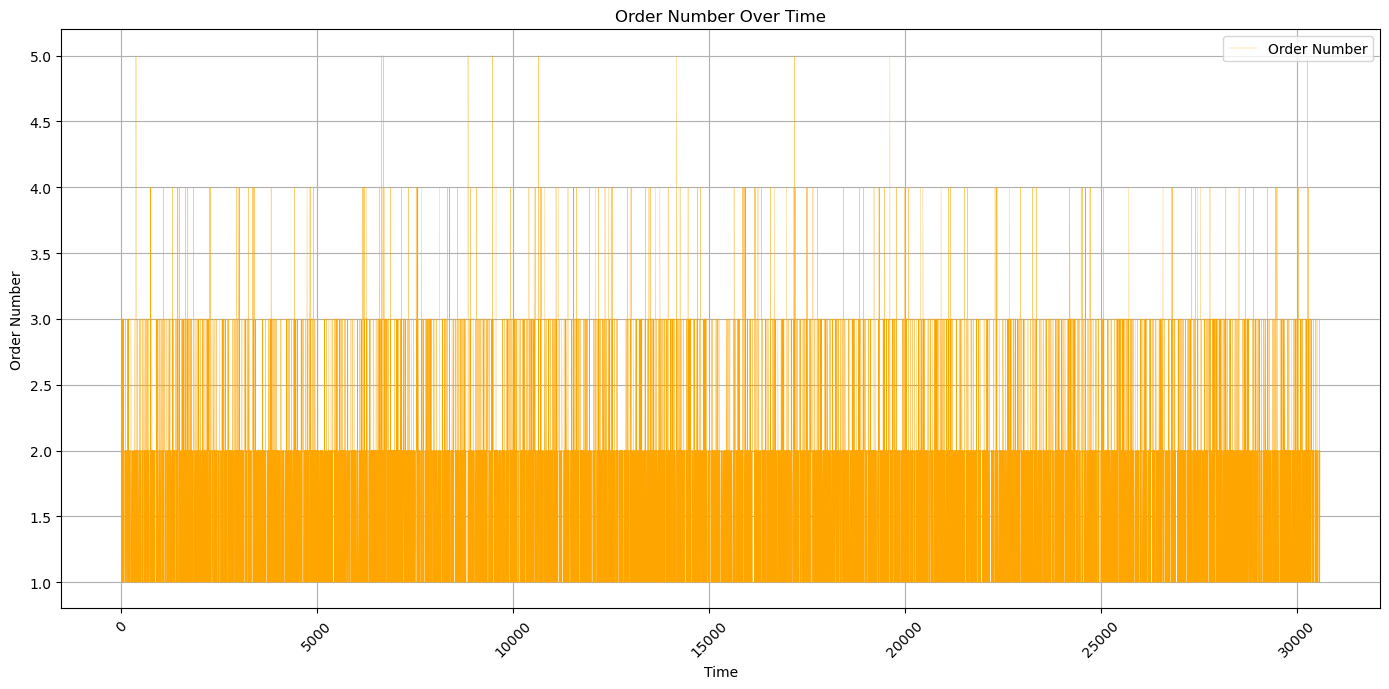

In [6]:
# Create a line chart for Order_Number over Time from the weighted_df DataFrame
plt.figure(figsize=(14, 7))
plt.plot(weighted_df['Time'], weighted_df['Order_Number'], label='Order Number', linestyle='-', color='orange', linewidth=0.2)
plt.xlabel('Time')
plt.ylabel('Order Number')
plt.title('Order Number Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
